In [1]:
!git clone https://github.com/Dragon4926/sign-gpt.git
%cd sign-gpt

fatal: destination path 'sign-gpt' already exists and is not an empty directory.
/content/sign-gpt


In [2]:
!pip install tensorflow==2.9

In [3]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [4]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [5]:
NUM_CLASSES = 26

# Dataset reading

In [6]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [7]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [10]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 26)                286       
                                                                 
Total params: 1,356
Trainable params: 1,356
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [25]:
!git add .
!git commit -m "after training"
!git push origin main

hint: You've added another git repository inside your current repository.
hint: Clones of the outer repository will not contain the contents of
hint: the embedded repository and will not know how to obtain it.
hint: If you meant to add a submodule, use:
hint: 
hint: 	git submodule add <url> sign-gpt
hint: 
hint: If you added this path by mistake, you can remove it from the
hint: index with:
hint: 
hint: 	git rm --cached sign-gpt
hint: 
hint: See "git help submodule" for more information.
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@9ce98e9d3c7f.(none)')
fatal: could not read Username for 'https://github.com': No such device or address


In [12]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [13]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
73/82 [=========================>....] - ETA: 0s - loss: 3.1453 - accuracy: 0.0675
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
82/82 [==============================] - 1s 8ms/step - loss: 3.1357 - accuracy: 0.0677 - val_loss: 2.9552 - val_accuracy: 0.1184
Epoch 2/1000
69/82 [========================>.....] - ETA: 0s - loss: 2.9011 - accuracy: 0.1372
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
82/82 [==============================] - 0s 4ms/step - loss: 2.8819 - accuracy: 0.1410 - val_loss: 2.6351 - val_accuracy: 0.1832
Epoch 3/1000
71/82 [========================>.....] - ETA: 0s - loss: 2.6679 - accuracy: 0.1910
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
82/82 [==============================] - 0s 3ms/step - loss: 2.6608 - accuracy: 0.1938 - val_loss: 2.4282 - val_accuracy: 0.3021
Epoch 4/1000
57/82 [===================>..........] - ETA: 0s - loss: 2.5164 - accuracy: 0.2379
E

In [14]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

28/28 [==============================] - 0s 1ms/step - loss: 0.5663 - accuracy: 0.8675


In [15]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [16]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 68ms/step
[9.0757811e-11 1.0365754e-18 2.6591823e-03 7.0490314e-06 1.2933111e-06
 3.1556281e-27 2.0829996e-03 7.3940784e-01 4.9898862e-08 2.3431566e-02
 3.0471365e-21 3.8554899e-07 1.4421590e-04 2.4327163e-15 6.8616509e-03
 3.8827548e-04 3.1470011e-03 5.4234307e-04 6.6631428e-13 1.0016453e-01
 2.6453071e-22 3.2460586e-30 1.2132857e-18 1.2116167e-01 4.1920487e-24
 2.5647542e-12]
7


# Confusion matrix

109/109 [==============================] - 0s 2ms/step


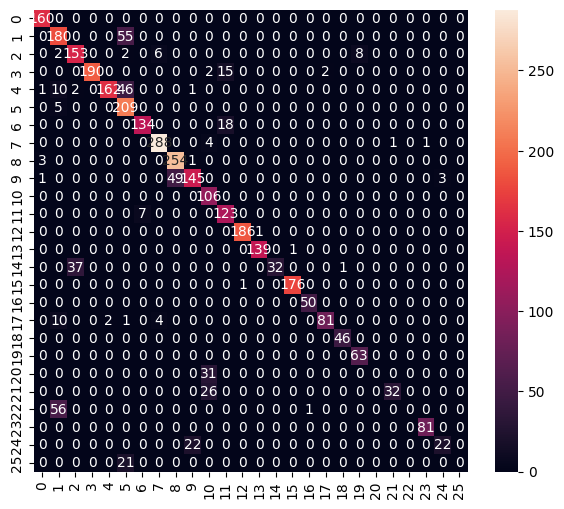

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       160
           1       0.68      0.77      0.72       235
           2       0.80      0.89      0.84       171
           3       1.00      0.91      0.95       209
           4       0.99      0.73      0.84       222
           5       0.63      0.98      0.76       214
           6       0.95      0.88      0.91       152
           7       0.97      0.98      0.97       294
           8       0.84      0.98      0.91       258
           9       0.86      0.73      0.79       198
          10       0.63      1.00      0.77       106
          11       0.79      0.95      0.86       130
          12       0.99      0.99      0.99       187
          13       0.99      0.99      0.99       140
          14       1.00      0.46      0.63        70
          15       0.99      0.99      0.99       177
          16       0.98      1.00      0.99        50
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [18]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [19]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

7456

# Inference test

In [20]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [21]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [22]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [23]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 751 µs, sys: 0 ns, total: 751 µs
Wall time: 4.88 ms


In [24]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.07583314e-11 1.03656753e-18 2.65918882e-03 7.04899867e-06
 1.29330999e-06 3.15562909e-27 2.08299770e-03 7.39407897e-01
 4.98988548e-08 2.34315675e-02 3.04711345e-21 3.85547509e-07
 1.44216159e-04 2.43271653e-15 6.86164713e-03 3.88275628e-04
 3.14699812e-03 5.42342372e-04 6.66314334e-13 1.00164525e-01
 2.64528689e-22 3.24605900e-30 1.21328578e-18 1.21161565e-01
 4.19201671e-24 2.56475440e-12]
7
